___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.utils import class_weight
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, make_scorer, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

plt.rcParams["figure.figsize"] = (10,6)

pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 1000)


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [130]:
df_male = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin1")
df_female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")

KeyboardInterrupt: 

## Explore Data

In [ ]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [ ]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,...,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,...,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,...,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,...,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,...,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right ha

In [ ]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [ ]:
df_female.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,...,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,...,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,...,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,...,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,...,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right ha

In [ ]:
df = pd.concat([df_male, df_female], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [ ]:
df.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,20757.198418,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,490.754450,72.252637,324.896506,306.636124,139.723467,1020.084707,241.619974,870.152274,608.999176,497.097561,386.04120,1477.490442,282.859097,1022.098879,251.738464,1252.013184,825.110086,621.851681,351.315920,35.132169,62.625906,22.263349,240.911338,785.914469,98.865359,263.033619,338.766645,295.010712,552.075972,467.007086,1102.049275,84.953362,203.861404,189.286585,152.182762,570.035267,196.334871,332.622940,70.756922,348.385465,385.733355,1040.059492,632.602011,412.037739,432.340804,475.512854,540.124918,483.239618,69.580422,406.479895,119.518787,375.441167,413.834707,1388.404417,113.916612,416.187047,259.192320,1129.362228,354.083553,145.072676,898.107779,866.665293,576.899967,1763.794825,1714.406065,1402.949077,1099.587179,622.198748,176.336355,789.695616,458.244562,129.617996,882.739947,1630.309492,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.761206,68.257251,174.749670

In [ ]:
df.shape

(6068, 108)

In [ ]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()[df.isna().sum() != 0]

Ethnicity    4647
dtype: int64

In [ ]:
df.select_dtypes(include ="object").nunique()

Gender                     2
Date                     253
Installation              12
Component                  3
Branch                     3
PrimaryMOS               285
SubjectsBirthLocation    152
Ethnicity                209
WritingPreference          3
dtype: int64

In [ ]:
df.corr()["DODRace"].sort_values(ascending=False)

C:\Users\white\AppData\Local\Temp\ipykernel_25020\926129711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["DODRace"].sort_values(ascending=False)


DODRace                           1.000000
interpupillarybreadth             0.140017
bizygomaticbreadth                0.100792
heelbreadth                       0.076786
headbreadth                       0.055987
bitragionchinarc                  0.047683
subjectid                         0.021578
SubjectNumericRace                0.017987
Age                               0.004738
bitragionsubmandibulararc        -0.020004
tragiontopofhead                 -0.021191
earprotrusion                    -0.029490
lowerthighcircumference          -0.037853
thighcircumference               -0.042693
earlength                        -0.042940
mentonsellionlength              -0.044308
footbreadthhorizontal            -0.053260
headcircumference                -0.054221
thighclearance                   -0.060196
buttockdepth                     -0.063854
hipbreadthsitting                -0.065287
bicepscircumferenceflexed        -0.066587
palmlength                       -0.074414
chestdepth 

<Axes: xlabel='DODRace', ylabel='Count'>

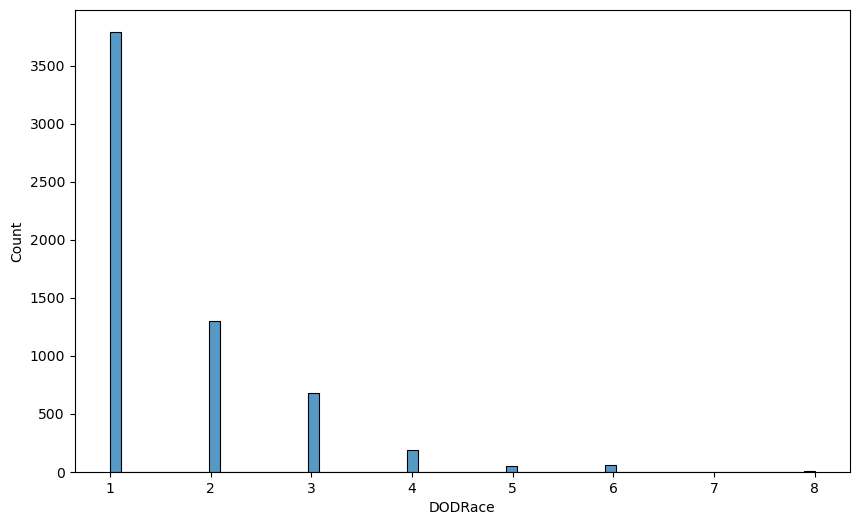

In [ ]:
sns.histplot(df.DODRace)

In [ ]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [ ]:
# drop subjectid, Date, WritingPreference, Branch, Component, Installation, SubjectNumericRace, PrimaryMOS, Heightin, Ethnicity

In [ ]:
df.drop(columns=["subjectid", "Date", "WritingPreference", "Branch", "Component", "Installation", "SubjectNumericRace", "PrimaryMOS", "Heightin", "Ethnicity"], inplace=True)

In [ ]:
df.SubjectsBirthLocation.unique()

array(['North Dakota', 'New York', 'Wisconsin', 'North Carolina',
       'Kentucky', 'Mississippi', 'Romania', 'Arkansas', 'Maryland',
       'Arizona', 'South Carolina', 'California', 'Washington',
       'Virginia', 'Texas', 'Illinois', 'Puerto Rico', 'Georgia',
       'Colombia', 'El Salvador', 'Michigan', 'Missouri', 'Philippines',
       'Florida', 'Pennsylvania', 'West Virginia', 'Nebraska', 'Indiana',
       'Montana', 'Colorado', 'Mexico', 'Minnesota', 'Iowa', 'Peru',
       'Oklahoma', 'Massachusetts', 'District of Columbia', 'Ohio',
       'Louisiana', 'Oregon', 'Tennessee', 'Alaska', 'Connecticut',
       'Guam', 'Vietnam', 'Hawaii', 'Netherlands', 'Taiwan', 'Idaho',
       'New Mexico', 'Belgium', 'Japan', 'Maine', 'New Jersey', 'Morocco',
       'Alabama', 'Canada', 'Germany', 'Kansas', 'South Korea',
       'British Virgin Islands', 'Utah', 'US Virgin Islands', 'Nevada',
       'Guyana', 'Delaware', 'Jamaica', 'Cameroon', 'New Hampshire',
       'Nicaragua', 'United Kingd

In [ ]:
df.SubjectsBirthLocation.value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

<Axes: >

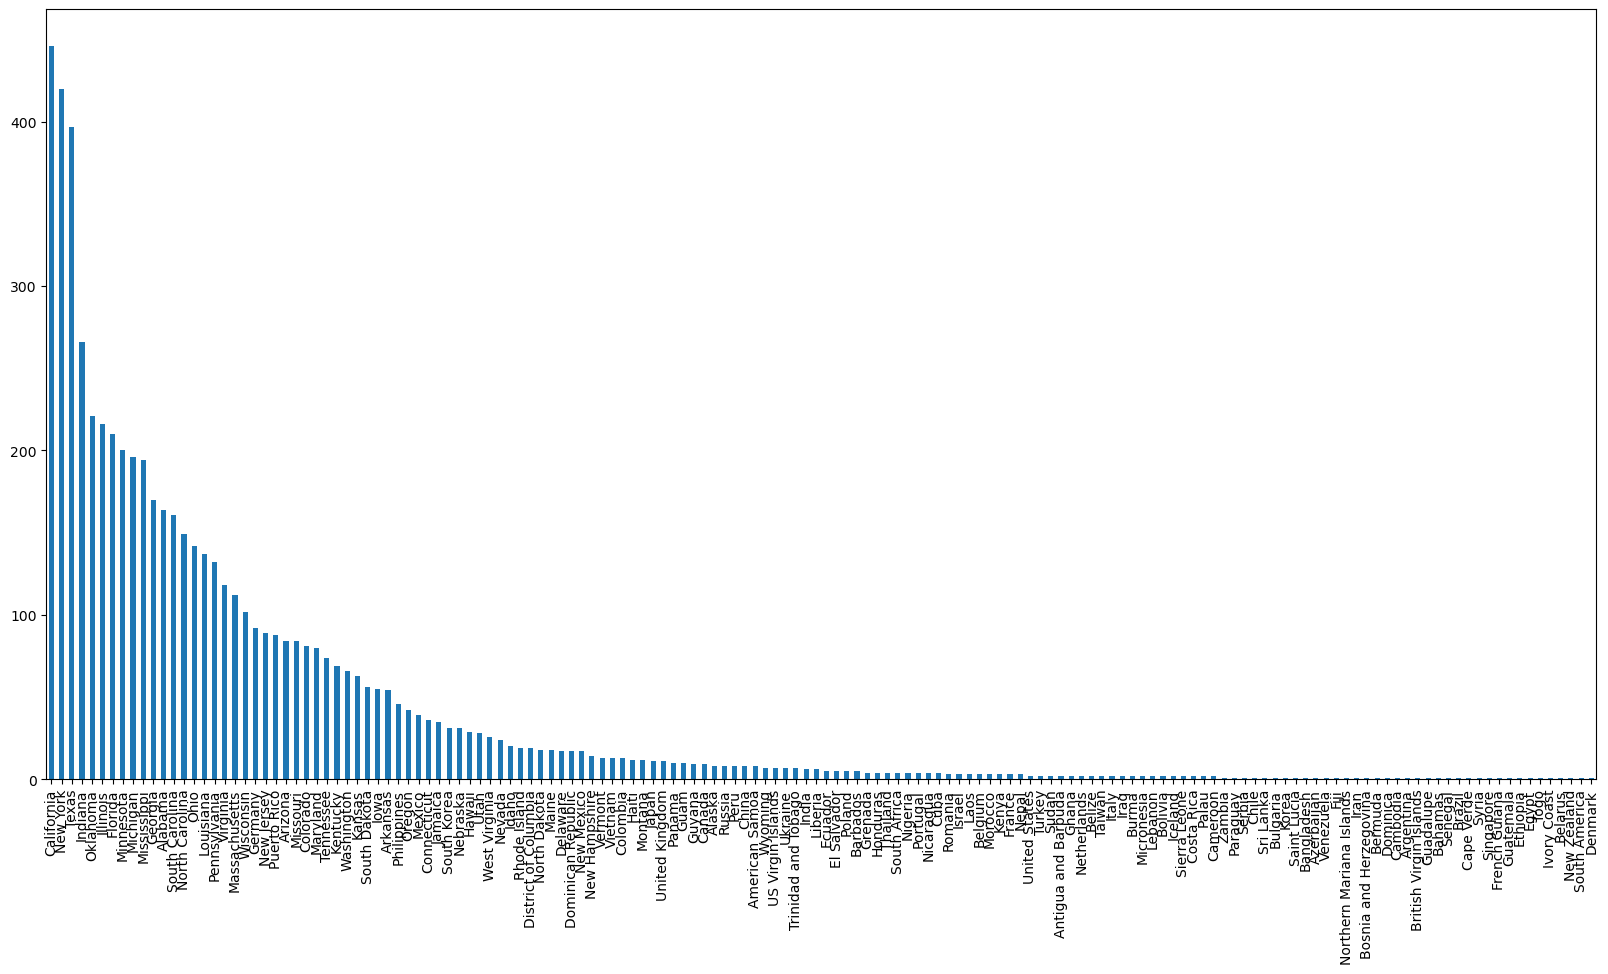

In [ ]:
df.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))

In [ ]:
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}

In [ ]:
df.SubjectsBirthLocation = df.SubjectsBirthLocation.apply(lambda x: states_by_region[x] if x in states_by_region else "not_from_US")

In [ ]:
df.SubjectsBirthLocation.value_counts()

South           2026
Midwest         1429
West             864
not_from_US      662
Northeast        632
Mid Atlantic     455
Name: SubjectsBirthLocation, dtype: int64

In [ ]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [ ]:
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)

In [ ]:
df = df[df["DODRace"].isin(["White", "Black", "Hispanic"])]

In [ ]:
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df_d = df.describe().T

In [ ]:
df_d_o1 = df_d[df_d["std"] >= df_d["mean"]]
df_d_o1

,count,mean,std,min,25%,50%,75%,max


In [ ]:
df_d_o2 = df_d[(df_d.iloc[:, 7] > (df_d.iloc[:, 6] + (df_d.iloc[:, 6] - df_d.iloc[:, 4]) * 1.5)) | (df_d.iloc[:, 3] < (df_d.iloc[:, 4] - (df_d.iloc[:, 6] - df_d.iloc[:, 4]) * 1.5))]
df_d_o2

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
balloffootlength,5769.0,195.118911,13.379000,151.0,186.0,196.0,205.0,245.0
biacromialbreadth,5769.0,399.706015,30.124094,283.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5769.0,341.663027,41.270615,216.0,312.0,342.0,370.0,490.0
bicristalbreadth,5769.0,274.903449,19.239580,197.0,262.0,274.0,288.0,362.0


In [ ]:
df_d[~df_d.index.isin(df_d_o2.index)]

,count,mean,std,min,25%,50%,75%,max
handbreadth,5769.0,85.098111,6.320915,67.0,80.0,86.0,90.0,105.0
handcircumference,5769.0,204.215635,15.486056,160.0,192.0,206.0,216.0,248.0


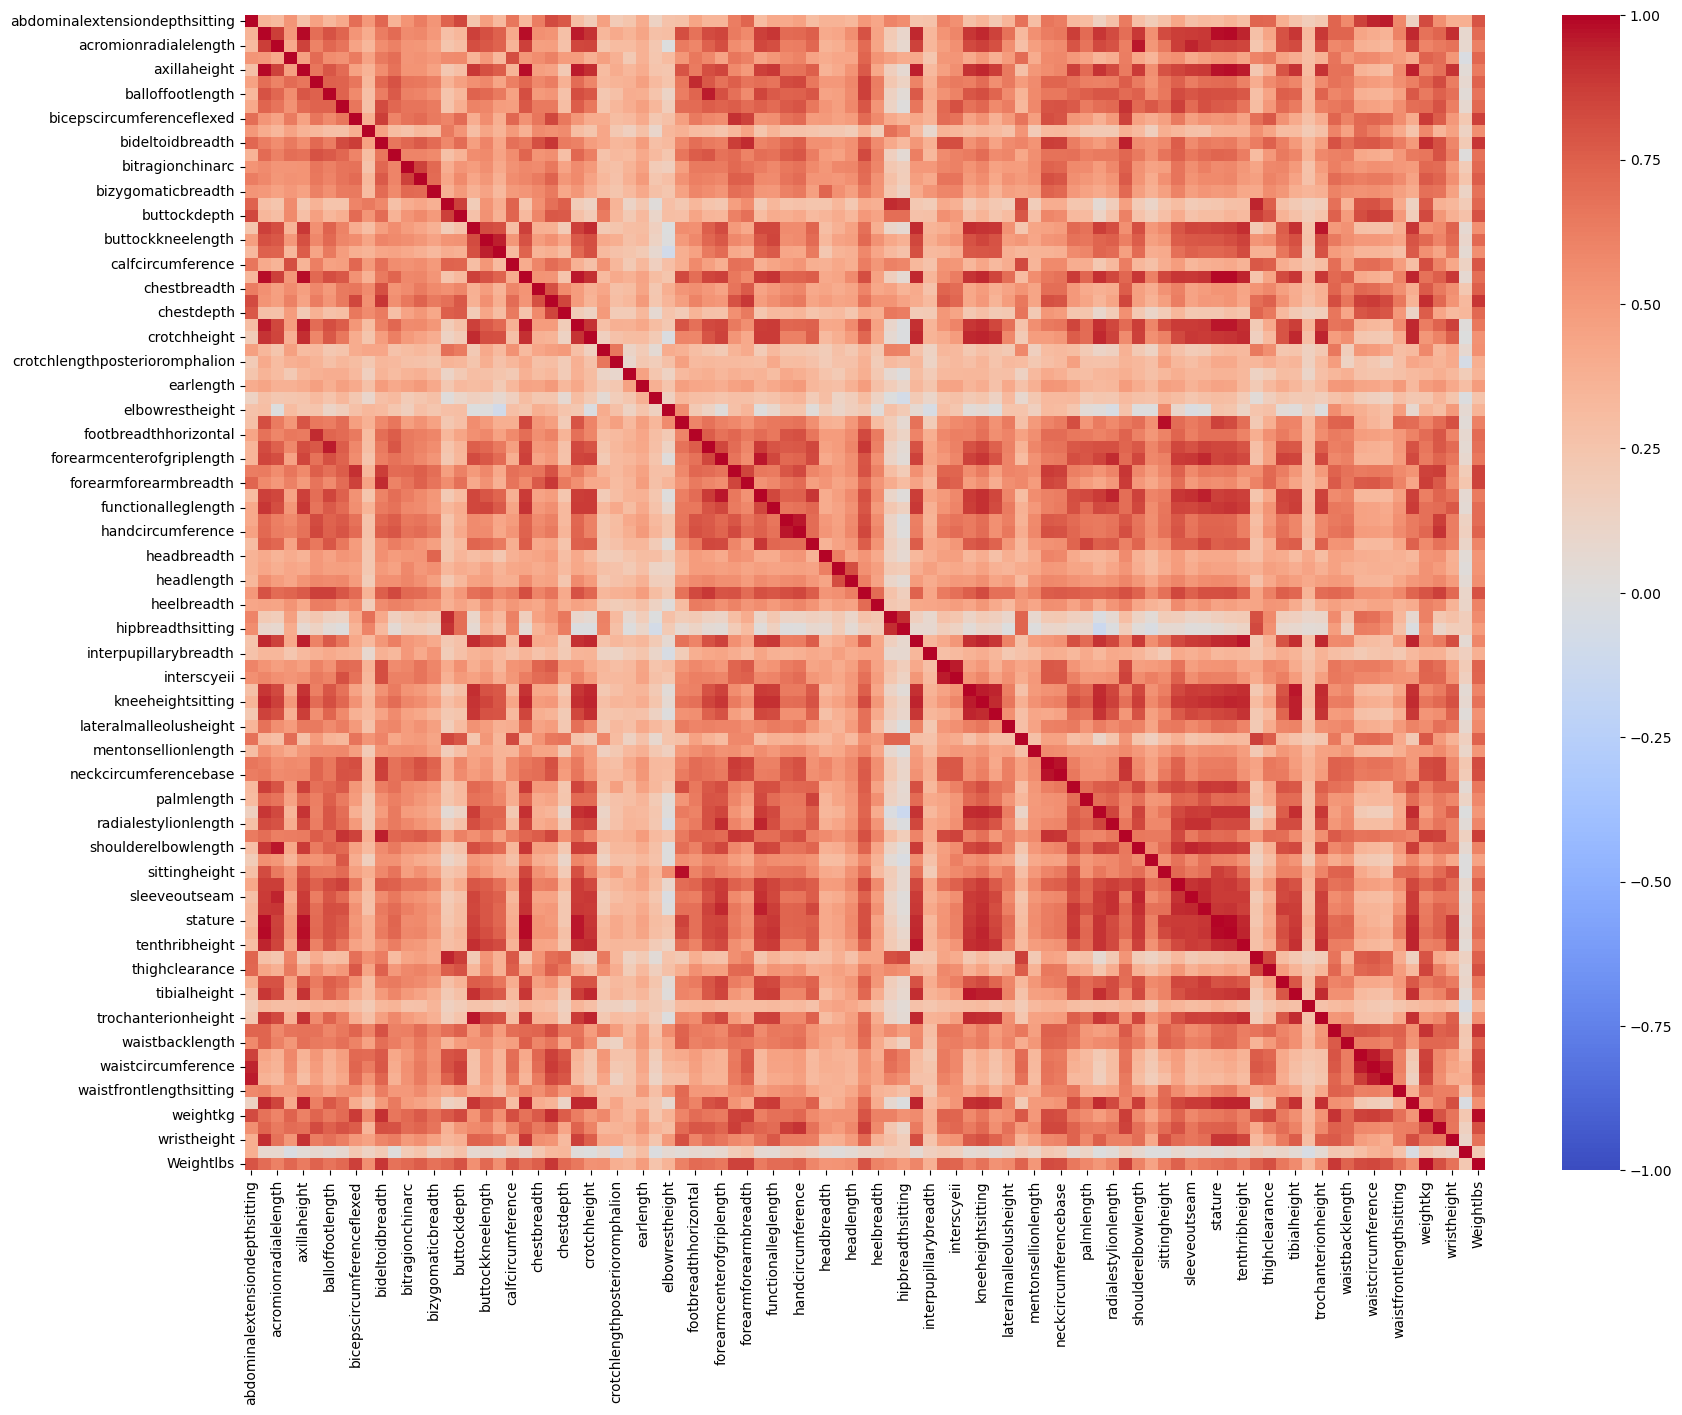

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
X = df.drop(columns=["DODRace"])
y = df.DODRace

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
cat = X_train.select_dtypes("object").columns

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [ ]:
log_model = LogisticRegression(class_weight="balanced", max_iter=10000 , random_state=101)

In [ ]:
log_pipe = Pipeline([("OneHotEncoder", column_trans), ("log_model", log_model)])

In [ ]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[237  18   5]
 [  9 106  21]
 [ 24 117 617]]
              precision    recall  f1-score   support

       Black       0.88      0.91      0.89       260
    Hispanic       0.44      0.78      0.56       136
       White       0.96      0.81      0.88       758

    accuracy                           0.83      1154
   macro avg       0.76      0.83      0.78      1154
weighted avg       0.88      0.83      0.85      1154


Train_Set
[[ 941   70   27]
 [  37  415   91]
 [  64  447 2523]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90      1038
    Hispanic       0.45      0.76      0.56       543
       White       0.96      0.83      0.89      3034

    accuracy                           0.84      4615
   macro avg       0.77      0.83      0.79      4615
weighted avg       0.88      0.84      0.85      4615



In [ ]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [ ]:
model = Pipeline([("OneHotEncoder", column_trans), ("log_model", log_model)])

In [ ]:
scores = cross_validate(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=10, return_train_score=True)

In [ ]:
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [ ]:
df_scores.mean()[2:]

test_precision_Hispanic     0.416050
train_precision_Hispanic    0.447320
test_recall_Hispanic        0.706970
train_recall_Hispanic       0.762021
test_f1_Hispanic            0.522966
train_f1_Hispanic           0.563705
dtype: float64

### Logistic Model GridsearchCV

In [ ]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [ ]:
model = Pipeline([("OneHotEncoder", column_trans), ("log_model", log_model)])

In [ ]:
param_grid = { "log_model__penalty": ["l1", "l2"],
               "log_model__solver": ["saga", "lbfgs"],
               "log_model__C": [0.001, 0.01, 0.1, 1, 2, 4, 10]}

In [ ]:
grid_model = GridSearchCV(estimator=model, param_grid= param_grid, cv=10, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True)

In [ ]:
grid_model.fit(X_train, y_train)

c:\Users\white\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\white\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\white\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\white\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fi

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log_model__C': [0.001, 0.01, 0.1, 1, 2, 4, 10],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['saga', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
grid_model.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log_model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='saga'))])

In [ ]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.718081
mean_train_score    0.773069
Name: 12, dtype: object

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[237  19   4]
 [ 10 107  19]
 [ 19 125 614]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90       260
    Hispanic       0.43      0.79      0.55       136
       White       0.96      0.81      0.88       758

    accuracy                           0.83      1154
   macro avg       0.76      0.84      0.78      1154
weighted avg       0.88      0.83      0.85      1154


Train_Set
[[ 951   65   22]
 [  36  416   91]
 [  61  441 2532]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91      1038
    Hispanic       0.45      0.77      0.57       543
       White       0.96      0.83      0.89      3034

    accuracy                           0.84      4615
   macro avg       0.77      0.84      0.79      4615
weighted avg       0.89      0.84      0.86      4615



In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)

In [ ]:
y_test_dummies = pd.get_dummies(y_test).values

In [ ]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.6305279584337948

In [ ]:
y_pred = grid_model.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model

In [ ]:
svm_model = SVC(class_weight="balanced", random_state=101)

In [ ]:
svm_pipe = Pipeline([("OneHotEncoder", column_trans), ("svm_model", svm_model)])

In [ ]:
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svm_model', SVC(class_weight='balanced', random_state=101))])

In [ ]:
eval_metric(svm_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[238  13   9]
 [ 10  95  31]
 [ 19 105 634]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.45      0.70      0.54       136
       White       0.94      0.84      0.89       758

    accuracy                           0.84      1154
   macro avg       0.76      0.82      0.78      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[ 963   45   30]
 [  21  450   72]
 [  44  335 2655]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93      1038
    Hispanic       0.54      0.83      0.66       543
       White       0.96      0.88      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [ ]:
model = Pipeline([("OneHotEncoder", column_trans), ("svm_model", svm_model)])

In [ ]:
scores = cross_validate(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=10, return_train_score=True)

In [ ]:
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [ ]:
df_scores.mean()[2:]

test_precision_Hispanic     0.431466
train_precision_Hispanic    0.537057
test_recall_Hispanic        0.662660
train_recall_Hispanic       0.832822
test_f1_Hispanic            0.521852
train_f1_Hispanic           0.652986
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
model = Pipeline([("OneHotEncoder", column_trans), ("svm_model", svm_model)])

In [ ]:
param_grid = {"svm_model__C": [0.05, 0.01, 1],
              "svm_model__gamma": ["scale", "auto", 0.01, 0.1, 0.5]}

In [ ]:
grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True)

In [ ]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svm_model',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svm_model__C': [0.05, 0.01, 1],
                         'svm_model__gamma': ['scale', 'auto', 0.01, 0.1, 0.5]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
grid_model.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svm_model',
                 SVC(C=1, class_weight='balanced', gamma=0.1,
                     random_state=101))])

In [ ]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score      0.69404
mean_train_score    0.771641
Name: 13, dtype: object

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[238  14   8]
 [  9 100  27]
 [ 15 126 617]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.42      0.74      0.53       136
       White       0.95      0.81      0.88       758

    accuracy                           0.83      1154
   macro avg       0.76      0.82      0.77      1154
weighted avg       0.88      0.83      0.84      1154


Train_Set
[[ 938   61   39]
 [  34  420   89]
 [  50  421 2563]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91      1038
    Hispanic       0.47      0.77      0.58       543
       White       0.95      0.84      0.90      3034

    accuracy                           0.85      4615
   macro avg       0.78      0.84      0.80      4615
weighted avg       0.89      0.85      0.86      4615



In [ ]:
decision_function = grid_model.decision_function(X_test)

In [ ]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.5620527699533548

In [ ]:
y_pred = grid_model.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [ ]:
cat

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [ ]:
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

In [ ]:
column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)


In [ ]:
rf_pipe = Pipeline([("OrdinalEncoder", column_trans), ("rf_model", rf_model)])

In [ ]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('rf_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[192   2  66]
 [ 10  11 115]
 [ 10   1 747]]
              precision    recall  f1-score   support

       Black       0.91      0.74      0.81       260
    Hispanic       0.79      0.08      0.15       136
       White       0.80      0.99      0.89       758

    accuracy                           0.82      1154
   macro avg       0.83      0.60      0.62      1154
weighted avg       0.83      0.82      0.78      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
model = Pipeline([("OrdinalEncoder", column_trans), ("rf_model", rf_model)])

In [ ]:
scores = cross_validate(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=5, return_train_score=True)

In [ ]:
df_scores = pd.DataFrame(scores, index = range(1, 6))

In [ ]:
df_scores.mean()[2:]

test_precision_Hispanic     0.780000
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.060805
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.112082
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [ ]:
model = Pipeline([("OrdinalEncoder", column_trans), ("rf_model", rf_model)])

In [ ]:
param_grid = {'rf_model__n_estimators':[100, 200, 300, 400],
             'rf_model__max_features':[15, 20, 'auto', None],
             'rf_model__max_depth':[2, 3, 4],
             'rf_model__min_samples_split':[15, 20, 25]}

In [ ]:
grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True)

In [ ]:
grid_model.fit(X_train, y_train)

c:\Users\white\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
107 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\white\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\white\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\white\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('rf_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'rf_model__max_depth': [2, 3, 4],
                         'rf_model__max_features': [15, 20, 'auto', None],
                         'rf_model__min_samples_split': [15, 20, 25],
                         'rf_model__n_estimators': [100, 200, 300, 400]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [ ]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('rf_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        max_features=15, min_samples_split=15,
                                        random_state=101))])

In [ ]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.607696
mean_train_score    0.680015
Name: 96, dtype: object

In [ ]:
grid_model.best_score_

0.6076962283384303

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[201  35  24]
 [ 18  82  36]
 [108 188 462]]
              precision    recall  f1-score   support

       Black       0.61      0.77      0.68       260
    Hispanic       0.27      0.60      0.37       136
       White       0.89      0.61      0.72       758

    accuracy                           0.65      1154
   macro avg       0.59      0.66      0.59      1154
weighted avg       0.75      0.65      0.67      1154


Train_Set
[[ 840  102   96]
 [  45  370  128]
 [ 291  775 1968]]
              precision    recall  f1-score   support

       Black       0.71      0.81      0.76      1038
    Hispanic       0.30      0.68      0.41       543
       White       0.90      0.65      0.75      3034

    accuracy                           0.69      4615
   macro avg       0.64      0.71      0.64      4615
weighted avg       0.79      0.69      0.71      4615



In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)

In [ ]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.421139113263002

In [ ]:
y_pred = grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
XGB_model = XGBClassifier(random_state=101)

In [ ]:
XGB_pipe = Pipeline([("OrdinalEncoder", column_trans), ("XGB_model", XGB_model)])

In [ ]:
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})

In [ ]:
XGB_pipe.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
eval_metric(XGB_pipe, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[226   4  30]
 [ 13  45  78]
 [ 15  16 727]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       260
           1       0.69      0.33      0.45       136
           2       0.87      0.96      0.91       758

    accuracy                           0.86      1154
   macro avg       0.82      0.72      0.75      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)

In [ ]:
XGB_pipe.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
eval_metric(XGB_pipe, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[230   7  23]
 [ 13  56  67]
 [ 21  28 709]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       260
           1       0.62      0.41      0.49       136
           2       0.89      0.94      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.74      0.76      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

In [ ]:
model = Pipeline([("OrdinalEncoder", column_trans), ("XGB_model", XGB_model)])

In [ ]:
scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)


In [ ]:
df_scores = pd.DataFrame(scores, index=range(1, 6))


In [ ]:
df_scores.mean()[2:]

test_precision_Hispanic     0.614581
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.362691
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.450673
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [ ]:
model = Pipeline([("OrdinalEncoder", column_trans), ("XGB_model", XGB_model)])

In [ ]:
grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [ ]:
grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_byle...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob',
                                                      predictor=None, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [ ]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=20,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.591165
mean_train_score    0.640873
Name: 5, dtype: object

In [ ]:
eval_metric(grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[186  40  34]
 [ 18  83  35]
 [105 181 472]]
              precision    recall  f1-score   support

           0       0.60      0.72      0.65       260
           1       0.27      0.61      0.38       136
           2       0.87      0.62      0.73       758

    accuracy                           0.64      1154
   macro avg       0.58      0.65      0.59      1154
weighted avg       0.74      0.64      0.67      1154


Train_Set
[[ 726  170  142]
 [  64  342  137]
 [ 326  703 2005]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1038
           1       0.28      0.63      0.39       543
           2       0.88      0.66      0.75      3034

    accuracy                           0.67      4615
   macro avg       0.60      0.66      0.61      4615
weighted avg       0.76      0.67      0.69      4615



In [ ]:
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [ ]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.523851709359133

In [ ]:
y_pred = grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

---
---

## Comparing Models

In [ ]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)

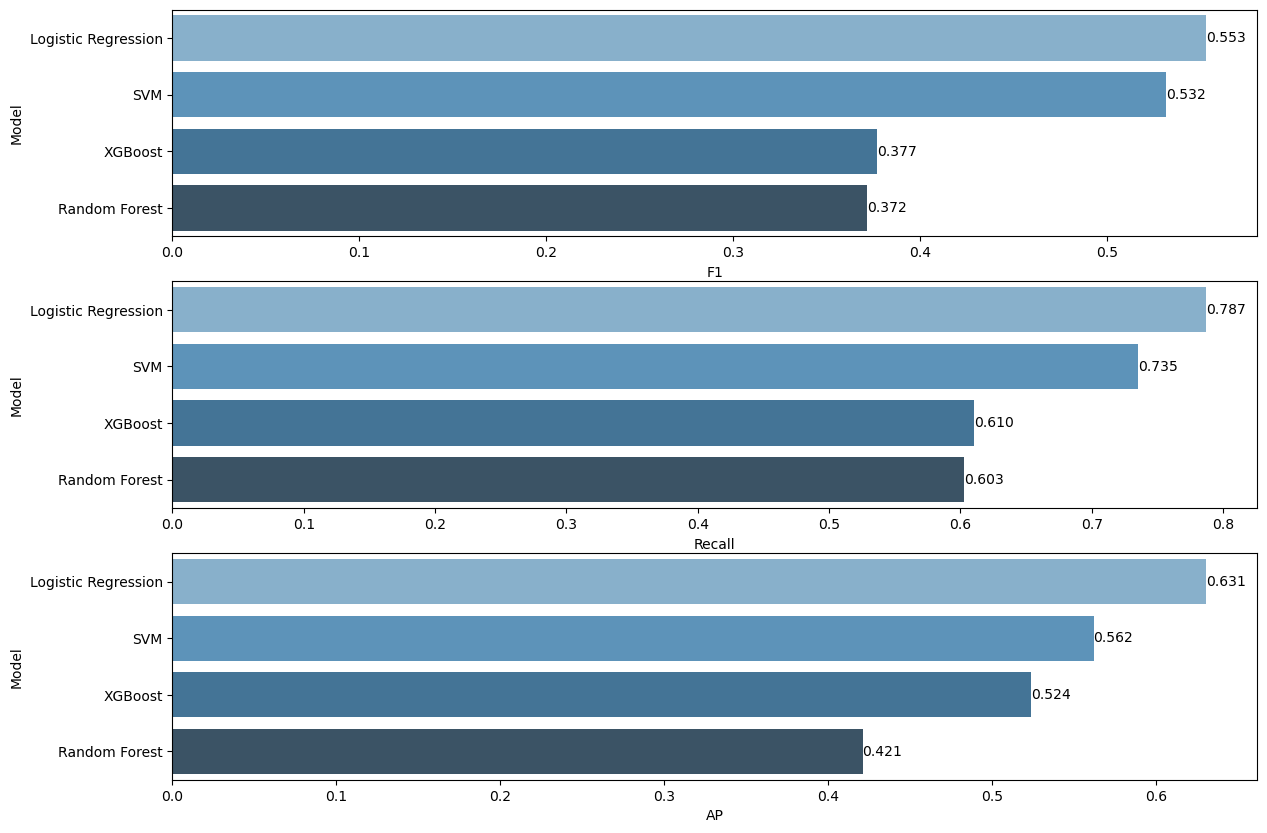

In [ ]:
plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show()

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [131]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [132]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [133]:
X_train_ohe = column_trans.fit_transform(X_train)

In [140]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [141]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [146]:
steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)

In [147]:
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [148]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [149]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/ Under Sampling

In [151]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [152]:
smote_pipeline = imbpipeline([("OneHotEncoder", column_trans), ("o", over), ("u", under), ("log", LogisticRegression(max_iter=10000, random_state=101))])

In [153]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [154]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[233  13  14]
 [  9  86  41]
 [ 15  47 696]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.90       260
    Hispanic       0.59      0.63      0.61       136
       White       0.93      0.92      0.92       758

    accuracy                           0.88      1154
   macro avg       0.81      0.82      0.81      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[ 922   48   68]
 [  36  317  190]
 [  32  168 2834]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91      1038
    Hispanic       0.59      0.58      0.59       543
       White       0.92      0.93      0.93      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.80      0.81      4615
weighted avg       0.88      0.88      0.88      4615



## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [160]:
from sklearn.metrics import matthews_corrcoef
y_pred = smote_pipeline.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.7627436733346764

In [161]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.7626364715248408

#  SHAP

In [162]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [163]:
X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

In [164]:
model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga",
)

In [165]:
model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [166]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[237  19   4]
 [ 10 107  19]
 [ 19 125 614]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90       260
    Hispanic       0.43      0.79      0.55       136
       White       0.96      0.81      0.88       758

    accuracy                           0.83      1154
   macro avg       0.76      0.84      0.78      1154
weighted avg       0.88      0.83      0.85      1154


Train_Set
[[ 951   65   22]
 [  36  416   91]
 [  61  441 2532]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91      1038
    Hispanic       0.45      0.77      0.57       543
       White       0.96      0.83      0.89      3034

    accuracy                           0.84      4615
   macro avg       0.77      0.84      0.79      4615
weighted avg       0.89      0.84      0.86      4615



In [167]:
model = Pipeline(steps=[("OneHotEncoder", column_trans_shap), ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101, penalty="l1", solver="saga",))])

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.412117
train_precision_Hispanic    0.452170
test_recall_Hispanic        0.708936
train_recall_Hispanic       0.772559
test_f1_Hispanic            0.520360
train_f1_Hispanic           0.570454
dtype: float64

In [168]:
features = column_trans_shap.get_feature_names_out()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


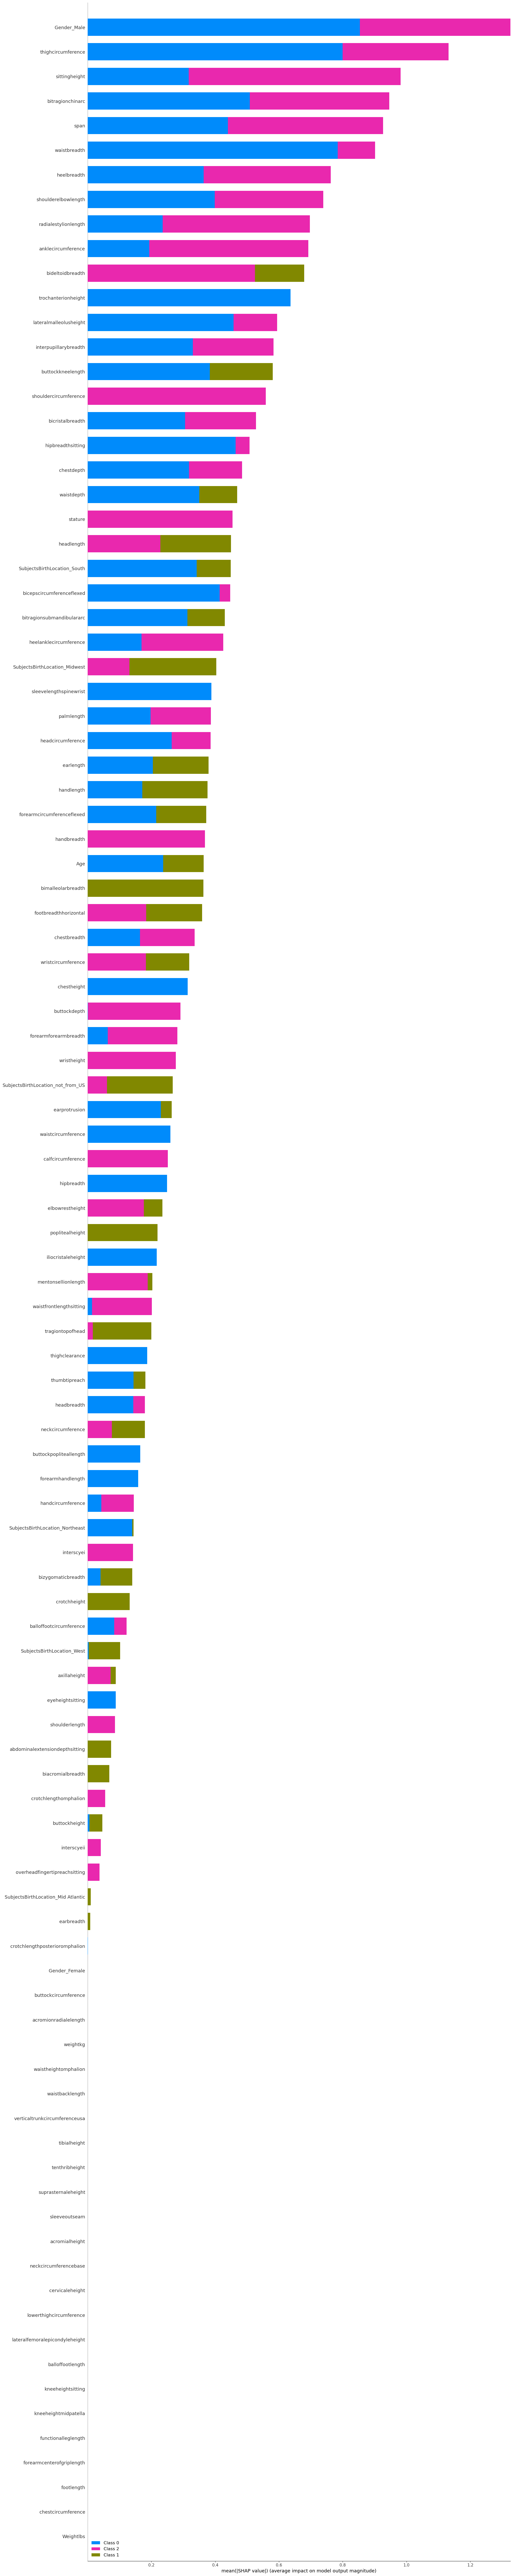

In [171]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

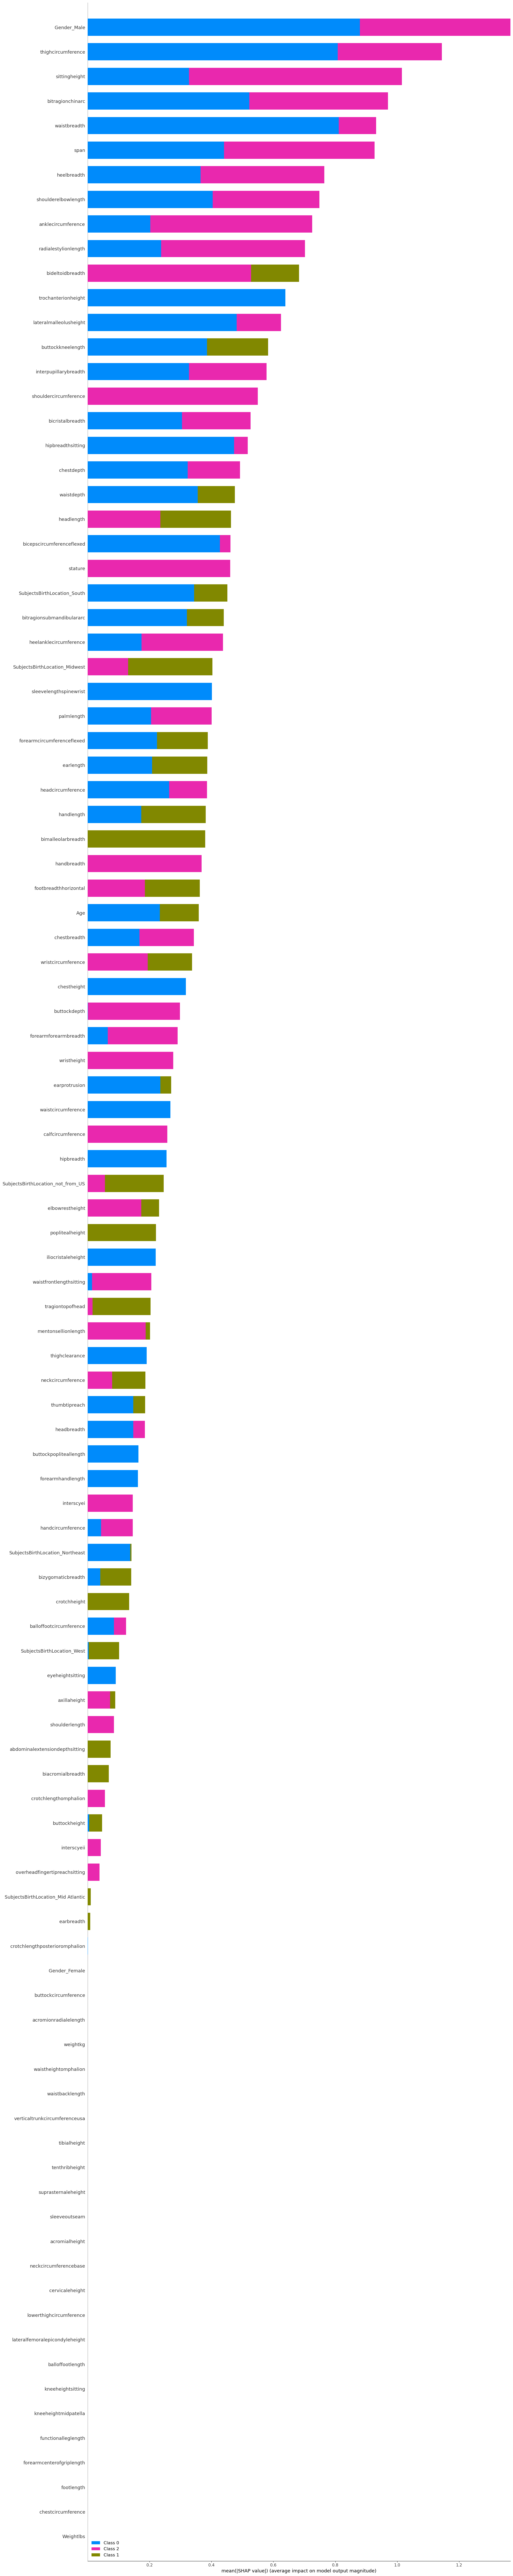

In [172]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [173]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [174]:
final_model = Pipeline([("OneHotEncoder", column_trans_final), ("log", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101, penalty="l1", solver="saga",))])

In [175]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [176]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]

In [177]:
male_mean_human["Gender"] = "Male"


In [178]:
male_mean_human["SubjectsBirthLocation"] = "California"


In [179]:
male_mean_human["WritingPreference"] = "Right hand"

In [180]:
male_mean_human

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [181]:
final_model.predict(pd.DataFrame(male_mean_human).T)

array(['White'], dtype=object)

In [182]:
y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7171762799891941

In [183]:
cohen_kappa_score(y_test, y_pred)

0.7003255410513691

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___